In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
INIT_LR = 1e-4
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=50

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_set = train_datagen.flow_from_directory(
        'Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical',
)

Found 2682 images belonging to 2 classes.


In [4]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_set = validation_datagen.flow_from_directory(
        'Dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 382 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_set = test_datagen.flow_from_directory(
        'Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 769 images belonging to 2 classes.


In [6]:
class_names = list(train_set.class_indices.keys())
class_names

['with_mask', 'without_mask']

In [7]:
vgg = VGG16(input_shape=[IMAGE_SIZE,IMAGE_SIZE] + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [8]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001, 
    patience=20,
    mode="max",
    restore_best_weights=True,
)

In [11]:
history =  model.fit(
  train_set,
  validation_data=validation_set,
  epochs=500,
  steps_per_epoch=len(train_set),
  validation_steps=len(validation_set),
  callbacks=[early_stopping]
)

Epoch 1/500
41/84 [=============>................] - ETA: 1:32 - loss: 0.3260 - accuracy: 0.8704

c:\Users\Biki\anaconda3\envs\venv1\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


84/84 [==============================] - 208s 2s/step - loss: 0.2019 - accuracy: 0.9228 - val_loss: 0.0702 - val_accuracy: 0.9791
Epoch 2/500
84/84 [==============================] - 211s 3s/step - loss: 0.0451 - accuracy: 0.9884 - val_loss: 0.0623 - val_accuracy: 0.9843
Epoch 3/500
84/84 [==============================] - 220s 3s/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0668 - val_accuracy: 0.9738
Epoch 4/500
84/84 [==============================] - 229s 3s/step - loss: 0.0161 - accuracy: 0.9963 - val_loss: 0.0454 - val_accuracy: 0.9869
Epoch 5/500
84/84 [==============================] - 233s 3s/step - loss: 0.0182 - accuracy: 0.9966 - val_loss: 0.0547 - val_accuracy: 0.9791
Epoch 6/500
84/84 [==============================] - 222s 3s/step - loss: 0.0161 - accuracy: 0.9970 - val_loss: 0.0600 - val_accuracy: 0.9817
Epoch 7/500
84/84 [==============================] - 209s 2s/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.0596 - val_accuracy: 0.9843
Epoch 8/500
84/84 

In [ ]:
model.evaluate(test_set)

25/25 [==============================] - 50s 2s/step - loss: 0.0395 - accuracy: 0.9909


[0.039471585303545, 0.9908972978591919]

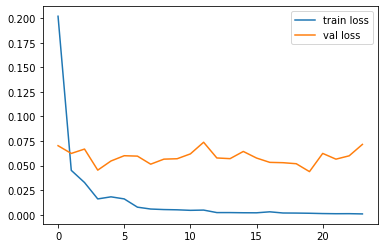

In [12]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

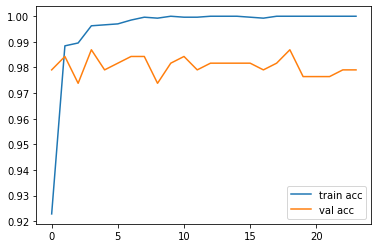

In [13]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save("Models/mask_detector.model", save_format="h5")